In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

## 데이터 준비

In [3]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

print("특성 이름:", iris.feature_names[2:4])
print("타겟 이름:", iris.target_names[:2])
print("데이터 크기:", X.shape)


특성 이름: ['petal length (cm)', 'petal width (cm)']
타겟 이름: ['setosa' 'versicolor']
데이터 크기: (100, 2)


## 모델 학습

In [5]:
svm_clf  = SVC(kernel='linear')
svm_clf .fit(X, y)
support_vectors = svm_clf.support_vectors_
print("지원 벡터(Support Vectors):")
print(support_vectors)


지원 벡터(Support Vectors):
[[1.9 0.4]
 [3.  1.1]]


## 결정 경계 시각화

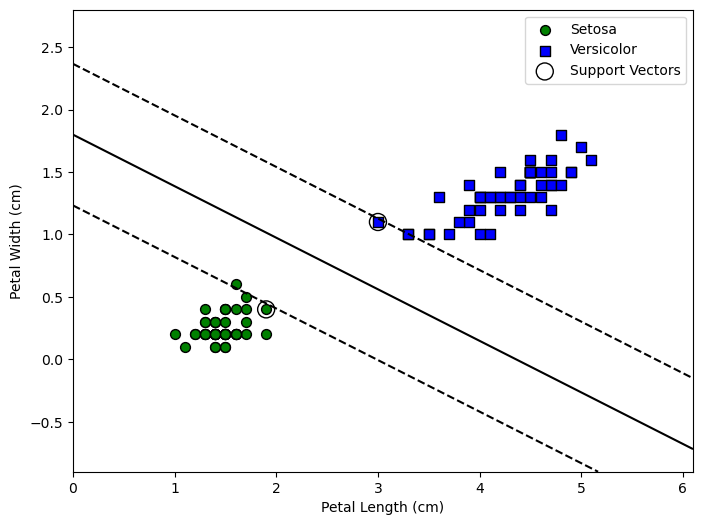

In [8]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
scaled_svm_clf1 = make_pipeline(scaler, svm_clf)
scaled_svm_clf1.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = scaled_svm_clf1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green', label='Setosa', s=50, edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Versicolor', s=50, edgecolor='k', marker='s')

plt.scatter(support_vectors[:, 0],support_vectors[:, 1],
            s=150, facecolors='none', edgecolors='black', label='Support Vectors', marker='o')


plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(loc='upper right')
plt.show()
